<a href="https://colab.research.google.com/github/vicentesarabia/ADA_informes/blob/main/Informe10_Problema_mochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.-Problema

Entrada: Entra dos arreglos, uno del valor de un objeto y otro el peso de este objeto, y también el peso máximo que puede cargar la mochila.

Salida: El máximo beneficio que se puede obtener con el peso máximo de la mochila.

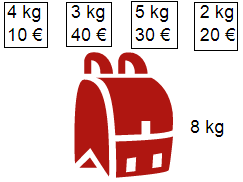

Un ladrón tiene una mochila de n peso, se puede robar m objetos los cuales cada uno tiene un valor y un peso, el problema a solucionar es cual es el máximo beneficio que puede sacar el ladrón, robando una cantidad b de objetos que permita el peso de su mochila.

# 2.- Descripción del algoritmo

**2.1 descripción solución programación dinámica**

Una de las soluciones a este problema implementar un algoritmo de forma dinámica, en la cual se busca el máximo beneficio posible con el peso de la mochila ingresado.

Primero se crea una matriz para guardar todas las posibles soluciones de tamaño n+1 / peso máximo +1 siendo n el largo del arreglo de valores.

Luego se recorren dos ciclos repetitivos donde el rango de estos son los límites de la matriz anterior generada, luego hay 3 condiciones, en la que la primera condición es si i=0 y w=0, los cuales serán los casos base de este algoritmo, se denota el valor máximo de j-peso considerando todos los valores del de 1 al i-esimo".
Entonces, si consideramos wi(peso en la enésima fila) podemos completarlo en todas las columnas que tienen "volar de peso>wi", con esto caben dos posibilidades:
-completar wi en la columna dada
-no tiene wi en la columna dada
ahora se tiene que tomar el máximo de estas dos posibilidades, por lo que llenamos el estado actual.

Una forma de explicar mejor esta solución es mediante la sub estructura óptima que está definido por la siguiente función de recursión:

$matriz[i,w]= \begin{cases}
  0  &  \text{if   i = 0 or w = 0 } \\
  max(matriz[i-1,w],matriz[i-1,w-w[i]+valores[i]) & \text{ if w[i]<=w} \\
  matriz[i-1,w] & \text{if w[i]>w}
\end{cases}$

In [35]:

import numpy as np

def problema_Mochila(valores, pesos, peso_maximo,verbose): 

    n = len(valores)

    global cont2
    matriz = np.array([[0]*(peso_maximo+ 1)]*(len(pesos) + 1))
    if verbose==True:print("se crea una matriz y se llena de 0s")
    if verbose==True:print(matriz)
    for i in range(n + 1):
        
        for w in range(peso_maximo + 1):
             
            if i == 0 or w == 0: 
                matriz[i, w] = 0 
                
            elif pesos[i-1] <= w:
                cont2+=1 
                
                matriz[i, w] = max(valores[i-1] + matriz[i-1, w-pesos[i-1]],   
                              matriz[i-1, w])
            else:
                cont2+=1 
                matriz[i, w] = matriz[i-1, w] 
    
    if verbose==True:print("se ingresan todos los subproblemas en la matriz")
    if verbose==True:print(matriz)
    if verbose==True:print("se retorna la posicion de la matriz[n,peso_maximo] ya que este es el maximo beneficio posible")
    if verbose==True:print("maximo beneficio:",matriz[n,peso_maximo])
    return matriz[n, peso_maximo] 

val = [6,3,6,4] 
pesos = [2,1,4,3]
peso_maximo = 10
cont2=0
verbose=True
print("La solucion optima es:",problema_Mochila(val,pesos,peso_maximo,verbose))
print("cantidad de subsoluciones:",cont2)

se crea una matriz y se llena de 0s
[[0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]
se ingresan todos los subproblemas en la matriz
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  6  6  6  6  6  6  6  6  6]
 [ 0  3  6  9  9  9  9  9  9  9  9]
 [ 0  3  6  9  9  9 12 15 15 15 15]
 [ 0  3  6  9  9 10 13 15 15 16 19]]
se retorna la posicion de la matriz[n,peso_maximo] ya que este es el maximo beneficio posible
maximo beneficio: 19
La solucion optima es: 19
cantidad de subsoluciones: 40


**2.2 Descripción solución greedy**

Este algoritmo se implementa de forma greedy fraccional, el cual toma 3 argumentos, primero el arreglo de valores, segundo un arreglo del peso en relación a los valores y el peso máximo que tiene la mochila.

Primero la función lo que hace es sacar una lista los cuales son los índices de los objetos, luego saca un ratio y luego los índices los ordena según el ratio que tiene este, luego función básicamente elige un ítem de los ítems que tienen la máxima relación entre peso/valor.
Si la mochila puede incluir el peso total del artículo, entonces el monto total del artículo se agrega a la mochila, si no es así, entonces agrega solo una fracción de este artículo para que la mochila se llene, esto se repite hasta que la mochila se llena por lo que el peso total alcanzado es el máximo peso posible dentro de la mochila.

In [22]:
def fractional_knapsack(value, weight, capacity,verbose):
    if verbose==True:print("arreglo de valores",value)
    if verbose==True:print("arreglo de pesos",weight)
    index = list(range(len(value)))
    global cont1
    ratio = [v/w for v, w in zip(value, weight)]
 
    index.sort(key=lambda i: ratio[i], reverse=True)
    
    max_value = 0
    if verbose == True:print("maximo beneficio inicial",max_value)
    if verbose == True:print("capacidad de la mochila",capacity)
    if verbose == True:print("si peso[i] <= capacidad de la mochila")
    for i in index:
        cont1+=1

        if verbose == True:print("si",weight[i],"<=", capacity)
        if weight[i] <= capacity:
            
            max_value += value[i]
            if verbose == True:print("maximo beneficio actual:",max_value)
            capacity -= weight[i]
            if verbose == True:print("capacidad mmochila actual",capacity)
        else:
            if verbose == True:print("se acabo el espacio de la mochila por lo que")
            max_value += value[i]*capacity/weight[i]
            if verbose == True:print("max_value += value[i]*capacity/weight[i]")
            if verbose == True:print("maximo beneficio:",max_value)
            break
 
    return max_value
 
 

value = [6,3,6,4,3,6,8] 
weight =[2,1,4,3,2,3,2]
cont1=0
capacity = 10
verbose=False
max_value= fractional_knapsack(value, weight, capacity,verbose)
print('El maximo beneficio de la maxima capacidad en relaion del peso de la mochila es:', (max_value))
print("cantidad de iteraciones:",cont1)


El maximo beneficio de la maxima capacidad en relaion del peso de la mochila es: 26.0
cantidad de iteraciones: 5


**2.3 verbose == true**

In [13]:
import random

def knapsack_instance_generator(N):
  val = []
  wt = []
  prev_v = 0
  prev_w = 0
  for i in range(N):
    v = random.randint(1, 100)
    val.append(prev_v + v)
    prev_v += v
    
    w = random.randint(1, 10)
    wt.append(prev_w + w)
    if (v >= 50):
        prev_w += w

  W = int(sum(wt) / 2)
  return W, val, wt

W, val, wt = knapsack_instance_generator(10)
verbose = True
max_value= fractional_knapsack(val, wt, W,verbose)

print('El maximo beneficio de la maxima capacidad en relaion del peso de la mochila es:', (max_value))
print(problema_Mochila(val, wt, W,verbose))

arreglo de valores [47, 96, 101, 138, 193, 270, 328, 419, 502, 574]
arreglo de pesos [2, 6, 2, 4, 9, 11, 19, 29, 35, 44]
maximo beneficio inicial 0
capacidad de la mochila 80
si peso[i] <= capacidad de la mochila
si 2 <= 80
maximo beneficio actual: 101
capacidad mmochila actual 78
si 4 <= 78
maximo beneficio actual: 239
capacidad mmochila actual 74
si 11 <= 74
maximo beneficio actual: 509
capacidad mmochila actual 63
si 2 <= 63
maximo beneficio actual: 556
capacidad mmochila actual 61
si 9 <= 61
maximo beneficio actual: 749
capacidad mmochila actual 52
si 19 <= 52
maximo beneficio actual: 1077
capacidad mmochila actual 33
si 6 <= 33
maximo beneficio actual: 1173
capacidad mmochila actual 27
si 29 <= 27
se acabo el espacio de la mochila por lo que
max_value += value[i]*capacity/weight[i]
maximo beneficio: 1563.103448275862
El maximo beneficio de la maxima capacidad en relaion del peso de la mochila es: 1563.103448275862
La solución optima es = 1545
1545


**2.4 Ejemplo greedy**


valor = [6,3,6,4] 
pesos = [2,1,4,3]
peso máximo = 6
máximo valor = 0

se crea index en rango del arreglo del valor

[0, 1, 2, 3]

luego un ratio

[3.0, 3.0, 1.5, 1.3333333333333333]

si la el peso del objeto i es menor igual a la capacidad de
la mochila
i=0
peso[i]<=capacidad

2<=6

por lo que

Máximo valor=6

se resta el peso a la capacidad de la mochila

capacidad:4

i=1

peso[i]<=capacidad

1<=4 si por lo que

se suma el valor al máximo valor anterior

Máximo valor=9

capacidad:3

i=2

peso[i]<=capacidad

4<=3 como no se cumple

Máximo valor = 9 +  6*(4/3)= 13.5

como la mochila ya se llenó se termina la ejecución

valor máximo = 13.5



# 3.- Correctitud

**3.1 Teorema correctitud solución dinámica**

El algoritmo resuelve el problema de la mochila de dos arreglos con valores y pesos de objetos con una capacidad limitada de espacio que retorna el máximo beneficio posible para un subproblema óptimo.

**3.2 Prueba teorema**

Para poder comprobar nuestro teorema se utilizará la sub estructura óptima:

**$matriz[i,w]= \begin{cases}
  0  &  \text{if   i = 0 or w = 0 } \\
  max(matriz[i-1,w],matriz[i-1,w-w[i]+valores[i]) & \text{ if w[i]<=w} \\
  matriz[i-1,w] & \text{if w[i]>w}
\end{cases}$**

Se toma que w[i]>w no agrega más elementos a la mochila, ya que se considera que está ya está llena, por lo que supera la capacidad de peso que tiene la mochila, y la condición w[i]<=w el cual si agrega elementos a la mochila, pero solo si este aumenta el valor total, teniendo esto el algoritmo se puede probar con inducción:

**Caso base**:

Con w(1) se considera el primer elemento i=1 como solución óptima del problema o subproblema

**Paso inductivo**:

Con w(m) se tiene que la solución óptima se basa en los subproblemas anteriores y depende totalmente de la fórmula de la sub estructura óptima mostrada anteriormente, por lo que el algoritmo es correcto.


**3.3 teorema correctitud solución greedy**

El algoritmo greedy no siempre obtiene la solución óptima.

**3.4 prueba del teorema**

El algoritmo de forma greedy se ejecuta hasta que una de los pesos de los objetos a robar sobrepasa el máximo peso posible de la mochila, la cual a medida que se ingresan objetos a la mochila esta va en decreciendo, por lo que el algoritmo greedy considera que esta es la solución óptima y se deja de ejecutar por lo que no siempre retornara la máxima solución óptima del problema. 







#4.- Tiempo de ejecución

**4.1 teorema tiempo de ejecución solución dinámica**

El algoritmo que resuelve el problema de la mochila de forma dinámica tiene un tiempo de ejecución de O(n*W).


**4.2 prueba de teorema**

Para poder sacar el tiempo de ejecución de este algoritmo es tan simple como ver el codigo, ya que se puede ver a simple vista.


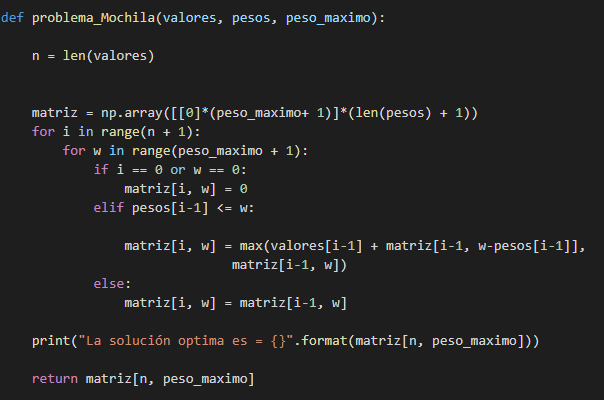

Se tiene que n es el largo del arreglo de valores que se pasa a nuestra función y W es el peso máximo que tiene la mochila, primero la creación de la matriz tiene una complejidad de O(1) porque solo se crea una matriz y se rellena de 0, luego nos encontramos con el ciclo for el cual itera hasta n por lo que su tiempo de ejecución es de O(n), luego se ingresa a otro ciclo for el cual itera hasta W+1 que es el peso máximo de la mochila lo que da un tiempo de ejecución de O(w) liego la operación de la primera condición if tiene un tiempo de ejecucion de O(1) y la siguiente condicion cada una de las operaciones también se calculan en O(1) por lo que el tiempo de ejecucion de este quedaria de la siguiente manera:

$O(1)+O(1)+O(n)*O(W)+O(1)+O(1)+O(1)=O(nW)$

La cual la complejidad del tiempo depende de W osea el peso maximo de la mochila.

**4.3 Teorema tiempo de ejecución greedy**

El algoritmo tiene un tiempo de ejecución de $O(nlog(n))$

**4.4 prueba teorema**

Este algoritmo crea un arreglo llamado index el cuál es la cantidad de elementos que tiene el arreglo de valores el cual se crea un ratio de cada uno de sus elementos, el cual su ratio es la relación valor/peso (vi/wi), luego según como quede el arreglo se ordena de forma decreciente, por esto se forman dos casos, cuando se ordena este arreglo index y cuando el arreglo ya está ordenado, cuando el arreglo ya está ordenado el tiempo de ejecución de este están solo la del ciclo for por lo que queda $O(n)$, en cambio, cuando se tiene que ordenar el arreglo index el tiempo de ejecución que toma este es de $O(n*log(n))$.

# 5.- Experimentos

**5.1 Experimento 1**

En este primer experimento se realizará una comparación en el tiempo de ejecución de los algoritmos que resuelven el problema de la mochila de forma dinámica y de forma greedy fraccionaria.

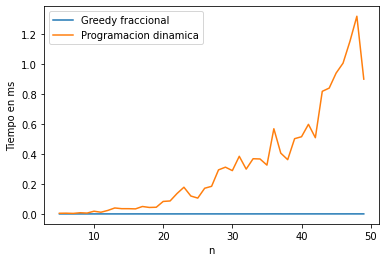

In [19]:
import random
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
#fractional_knapsack(value, weight, capacity,verbose)
#problema_Mochila(valores, pesos, peso_maximo)
x,y,y1 = [],[],[]
vari=1;
verbose=False
for n in range(5,50):

  W, val, wt = knapsack_instance_generator(n)

  
  t = repeat(setup="from __main__ import fractional_knapsack", stmt=f"fractional_knapsack({val},{wt},{W},{verbose})", repeat=1, number=10)
  j = repeat(setup="from __main__ import problema_Mochila", stmt=f"problema_Mochila({val},{wt},{W},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(j)


plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Greedy fraccional","Programacion dinamica"])


plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

**observaciones y análisis**

Se puede ver que hay una gran diferencia entre un algoritmo y el otro, como también que el algoritmo dinámico tiene un tiempo de ejecución mucho mayor, pero uno se pregunta porque, ya que el algoritmo greedy tiene un tiempo de ejecución O(nlogn) o O(n) dependiendo del arreglo index y el algoritmo dinámico tiene un tiempo de ejecución de O(n*W) y este drástico cambio se puede deber al tamaño que toma el peso de la mochila, ya que mientras mayor sea este el for dentro de la implementación del algoritmo dinámico será mucho más largo, lo cual es más tiempo de ejecución lo cual hace que O(n*W)>O(n) lo cual es correctamente graficado.

**5.2 Experimento 2**

En este experimento se compara la cantidad de subproblemas resueltos en el algoritmo dinámico vs la cantidad de iteraciones que tiene el algoritmo greedy

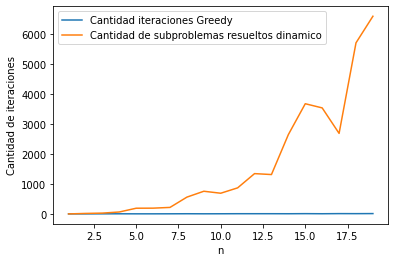

In [27]:
import random
import matplotlib.pyplot as plt

x=[n for n in range(1,20)] 
y1=[]
y=[]; 
verbose=False
for n in range(1,20):
  W, val, wt = knapsack_instance_generator(n)

  cont1=0
  
  fractional_knapsack(val,wt,W,verbose)
  cont2=0

  problema_Mochila(val,wt,W,verbose)

  y.append(cont1)
  y1.append(cont2)


plt.plot(x,y)
plt.plot(x,y1)

plt.legend(["Cantidad iteraciones Greedy", "Cantidad de subproblemas resueltos dinamico"])

plt.xlabel('n')
plt.ylabel('Cantidad de iteraciones')
plt.show()

**observaciones y análisis**

Se puede ver que la cantidad de subproblemas resueltos por el algoritmo dinámico supera por mucho la cantidad de iteraciones que hace el algoritmo greedy y esto tiene una razon, ya que el algoritmo dinámico explora todas las posibles combinaciones que puede tener la mochila, en cambio, el algoritmo greedy crea el ratio de los objetos y los ordena por lo que la cantidad de iteraciones que haga el algoritmo dependerá únicamente de la cantidad de objetos que se le pasen o si el peso máximo de la mochila ya fue excedido.